# Data Science with Python and Dask
## Chapter 7: Visualizing DataFrames with Seaborn

### Section 7.2.1

In [ ]:
# Listing 7.1
import dask.dataframe as dd
import pyarrow
from dask.diagnostics import ProgressBar
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set working directory and read in the data
os.chdir('/Users/aorourke/Documents')
nyc_data = dd.read_parquet('nyc_final', engine='pyarrow')

Filter out any data after June 2017, because those months were not completely reported in this dataset.

Apply the agg method (aggregate) over it to calculate the count of citations and the mean of the temperature grouped by month.

In [ ]:
# Listing 7.2
row_filter = ~nyc_data['Citation Issued Month Year'].isin(['07-2017','08-2017','09-2017','10-2017','11-2017','12-2017'])
nyc_data_filtered = nyc_data[row_filter]

citationsAndTemps = nyc_data_filtered.groupby('Citation Issued Month Year').agg({'Summons Number': 'count', 'Temp': 'mean'})

Collect annd plot the data

The whitegrid style produces a clean-looking figure that has a white background with gray x and y grid lines.

Blank figure using the plt.subplots function and specify the size we want.

seaborn.despine is another aesthetic modification to the figure we’re about to produce. This simply removes the border box around the figure so all we can see are the gridlines in the plot area.



In [ ]:
# Listing 7.3
# Plot a scatter plot of Temp vs. Number of Citations
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

with ProgressBar():
    sns.scatterplot(x="Temp", y="Summons Number",
                data=citationsAndTemps.compute(), ax=ax)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)

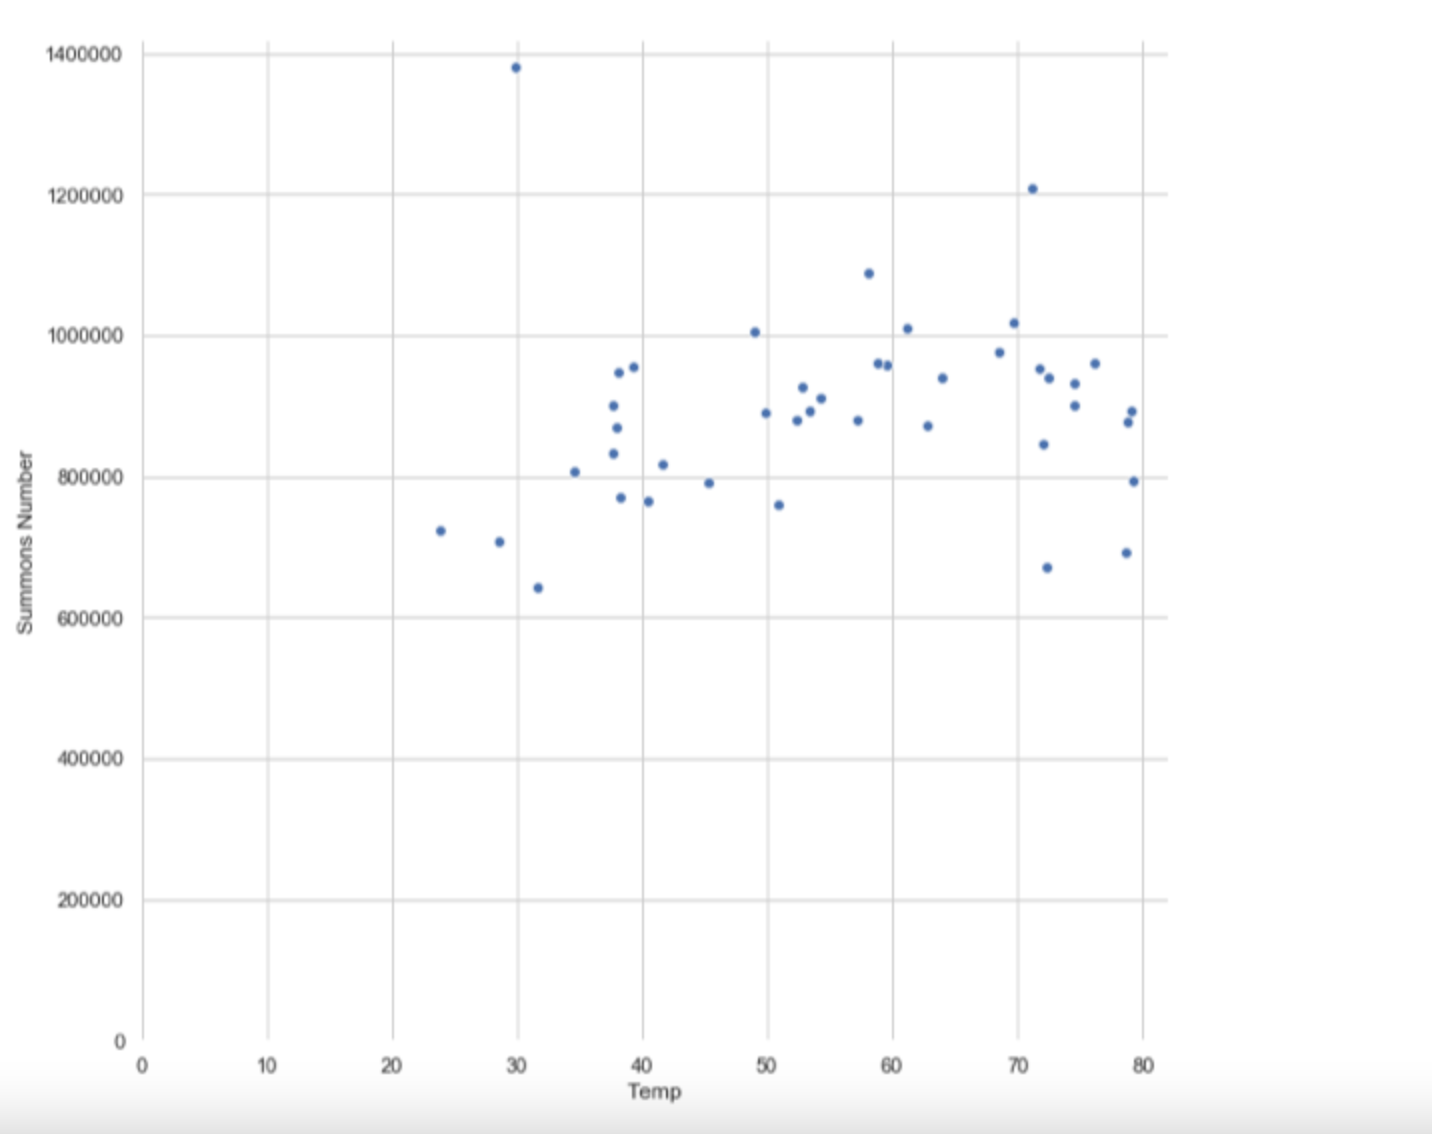

A positive relationship exists between the two variables. As we move from 30 degrees to 60 degrees, the number of citations generally increases. The points are scattered fairly far apart from each other, hence the indication of a weak correlation.

### Section 7.2.2 Adding a linear regression line to the scatterplot

see the gradual pattern in the data better by plotting a regression plot instead of a scatterplot.

Added the optional parameter, robust. This parameter tells Seaborn to produce a robust regression. A robust regression minimizes the influence of outliers on the regression equation. This means that points on the y axis that sit far away from other points won’t pull the line we’re trying to draw through the points up (or down) by very much. This is a good thing since these points are unlikely to occur on a regular basis, so we should treat them as anomalies instead of observations

In [ ]:
# Listing 7.4
# Add a robust regression line to the scatter plot using regplot
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

with ProgressBar():
    sns.regplot(x="Temp", y="Summons Number",
               data=citationsAndTemps.compute(), ax=ax,
               robust=True)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)

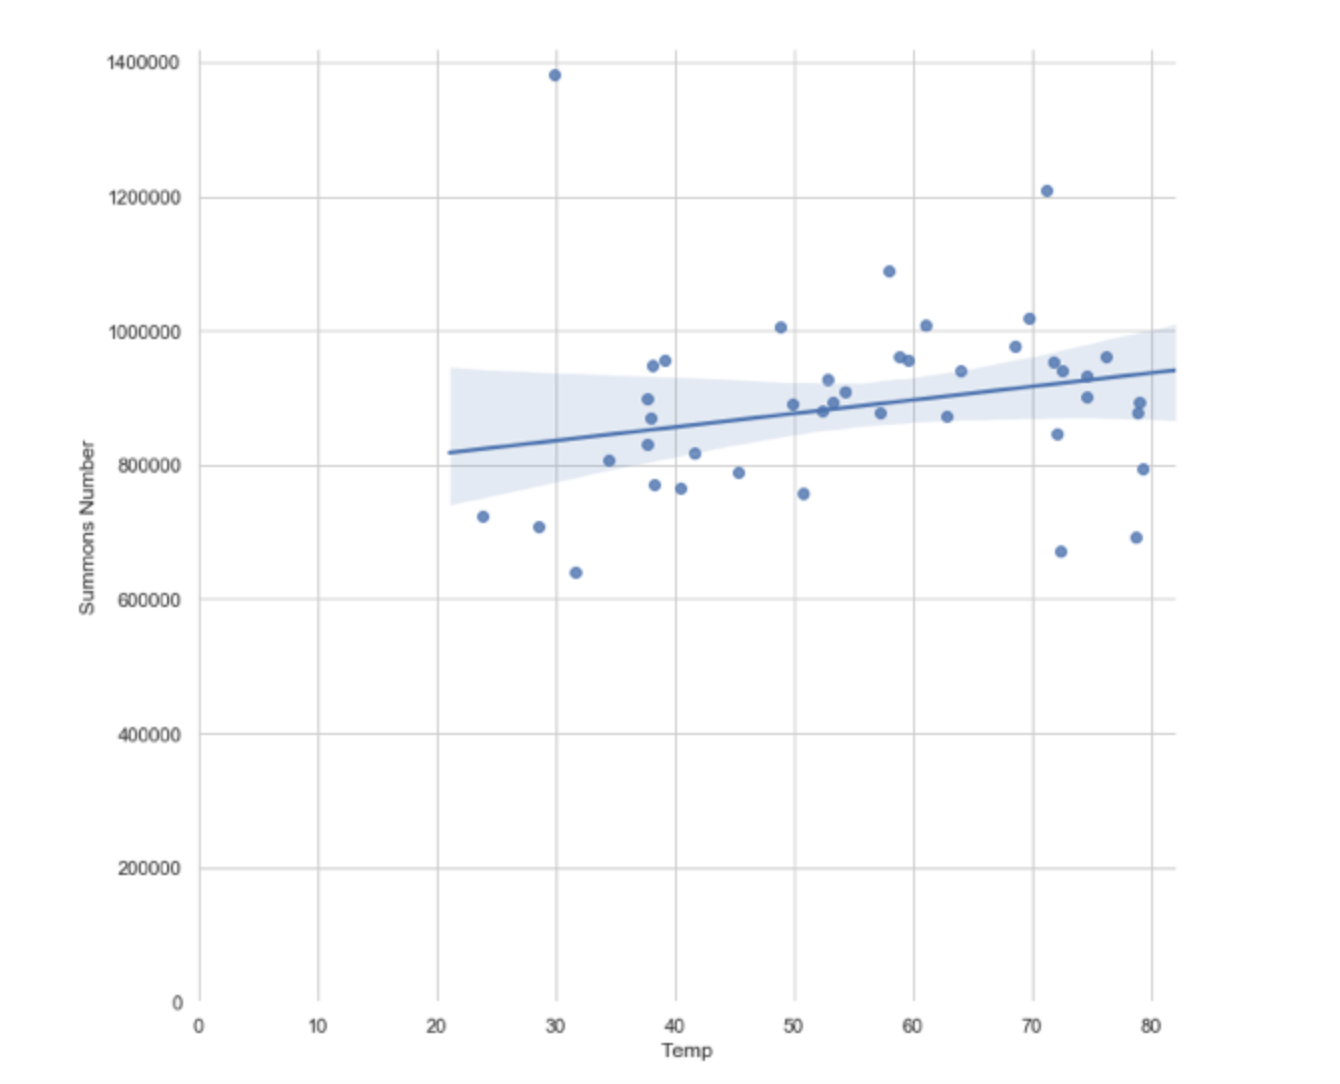


Regression is a statistical estimation. Where the line was drawn could have been influenced by unusual observations (called outliers). The shaded area around the line represents the confidence interval, meaning that there is a 95% chance that the best-fitting line is somewhere inside that area. The line itself is the best “guess” given the data that was provided here.

### 7.2.3 Adding a non-linear line to a scatterplot

it appears that the number of citations actually starts gradually decreasing past about 60 degrees. This makes intuitive sense: perhaps fewer enforcement officers are sent on patrol in more extreme weather. This would be a great opportunity to follow up with management to see if our hypothesis is true,

In [ ]:
# Listing 7.5
# Try a non-linear fit by setting the order parameter to 2 (roughly parabolic shape)
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

with ProgressBar():
    sns.regplot(x="Temp", y="Summons Number",
               data=citationsAndTemps.compute(), ax=ax,
               order=2)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)

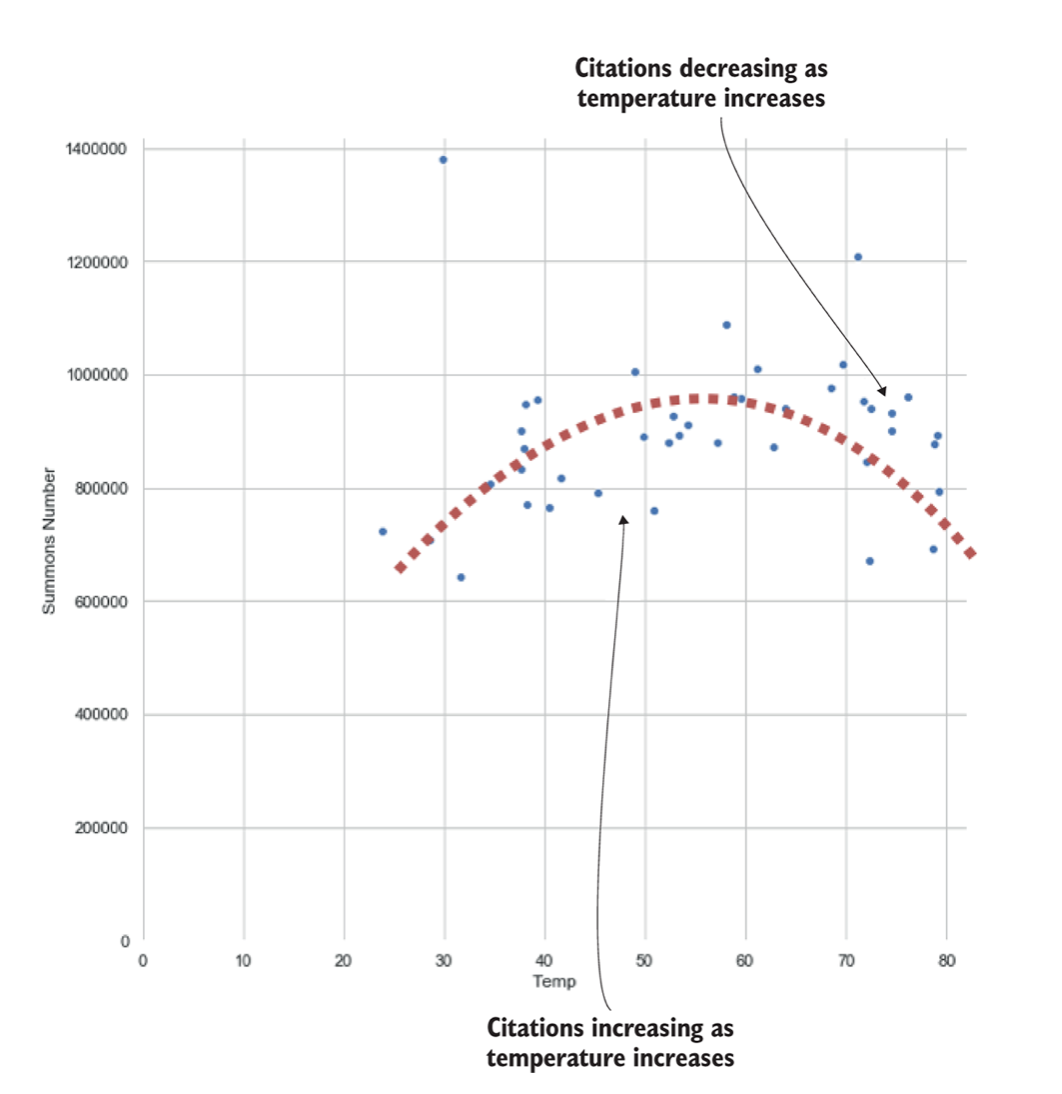


fitting a parabola to the data might result in a more accurate fit. As you can see, moving from 20 degrees to about 60 degrees, the relationship seems to be positive: as the temperature increases, the number of citations written also increases. However, around the 60 degrees mark, the relationship seems to reverse direction.


As temperature increases from 60 degrees, the number of citations seems to decrease overall.

he order parameter determines how many terms to use in order to fit a nonlinear curve. Since the data looks roughly parabolic, an order of 2 is used.

## Section 7.3 Visualizing categorical relationships with violinplot


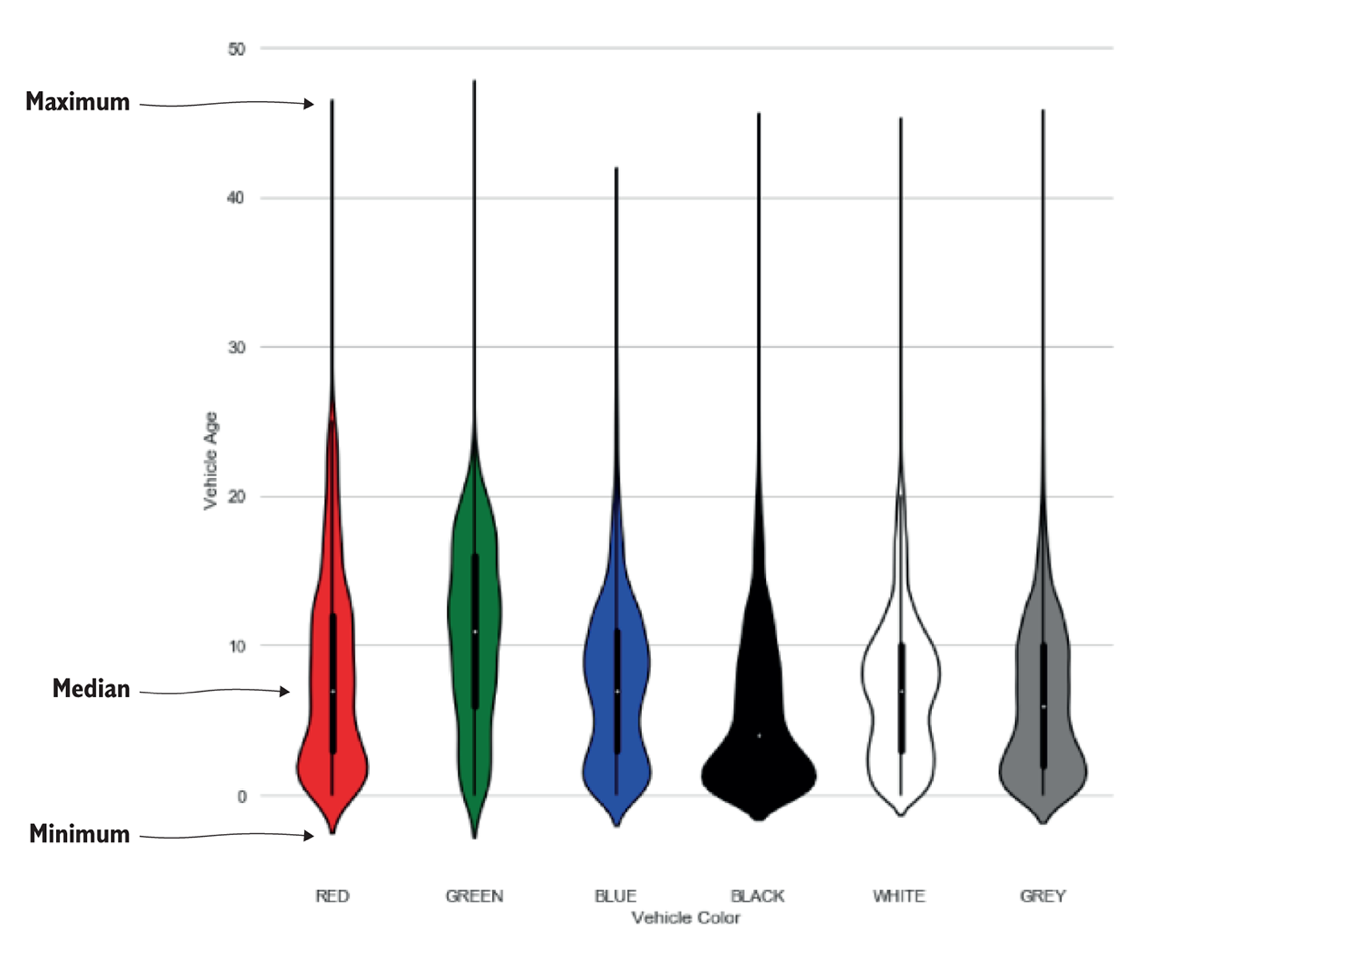

Violinplots are similar to boxplots in that they are a visual representation of several statistical properties of a variable including the mean, median, 25th percentile, 75th percentile, minimum, and maximum. But violionplots also incorporate a histogram into the plot, so you can determine what the distribution of the data looks like and where the most frequently occurring points are.

Like boxplots, violinplots are used to compare behaviors of a continuous variable across groups. For example, we might want to know how the age of a vehicle relates to the color of a vehicle. Do black cars tend to be newer or older? Would you be more likely to receive a ticket in a new red car or an old green car? A violinplot will help us investigate these questions.

### Section 7.3.1

Read in the data, select the relevant columns, and filter for the top vehicle colors.

In [ ]:
# Listing 7.6
# Read in the data and filter down to the six most popular vehicle colors
nyc_data_withVehicleAge = dd.read_parquet('nyc_data_vehicleAge', engine='pyarrow')

row_filter = nyc_data_withVehicleAge['Vehicle Color'].isin(['BLACK','WHITE','GREY','RED','GREEN','BLUE'])
column_filter = ['Vehicle Age','Vehicle Color']

ages_and_colors = nyc_data_withVehicleAge[row_filter][column_filter]

In [ ]:
# Listing 7.7
# Get a count of how many vehicle citations match our criteria
with ProgressBar():
    print(ages_and_colors.count().compute())

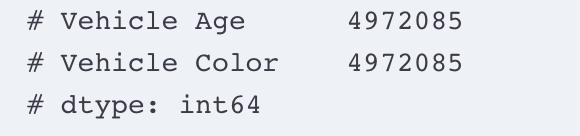

We then put the colors in a list so we can tell Seaborn how to arrange the groups on the violinplot.

The order parameter allows you to specify a custom order to display the groups in from left to right. Otherwise, the choice is random.

palette parameter to ensure the colors of the violinplot match the vehicle colors they represent (the red violinplot will be colored red, and so forth)

In [ ]:
# Listing 7.8
# Plot a violinplot to show the distributions of vehicle ages grouped by vehicle color
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

group_order = ["RED", "GREEN", "BLUE", "BLACK", "WHITE", "GREY"]

with ProgressBar():
    sns.violinplot(x="Vehicle Color", y="Vehicle Age", data=ages_and_colors.compute(), order=group_order, palette=group_order, ax=ax)

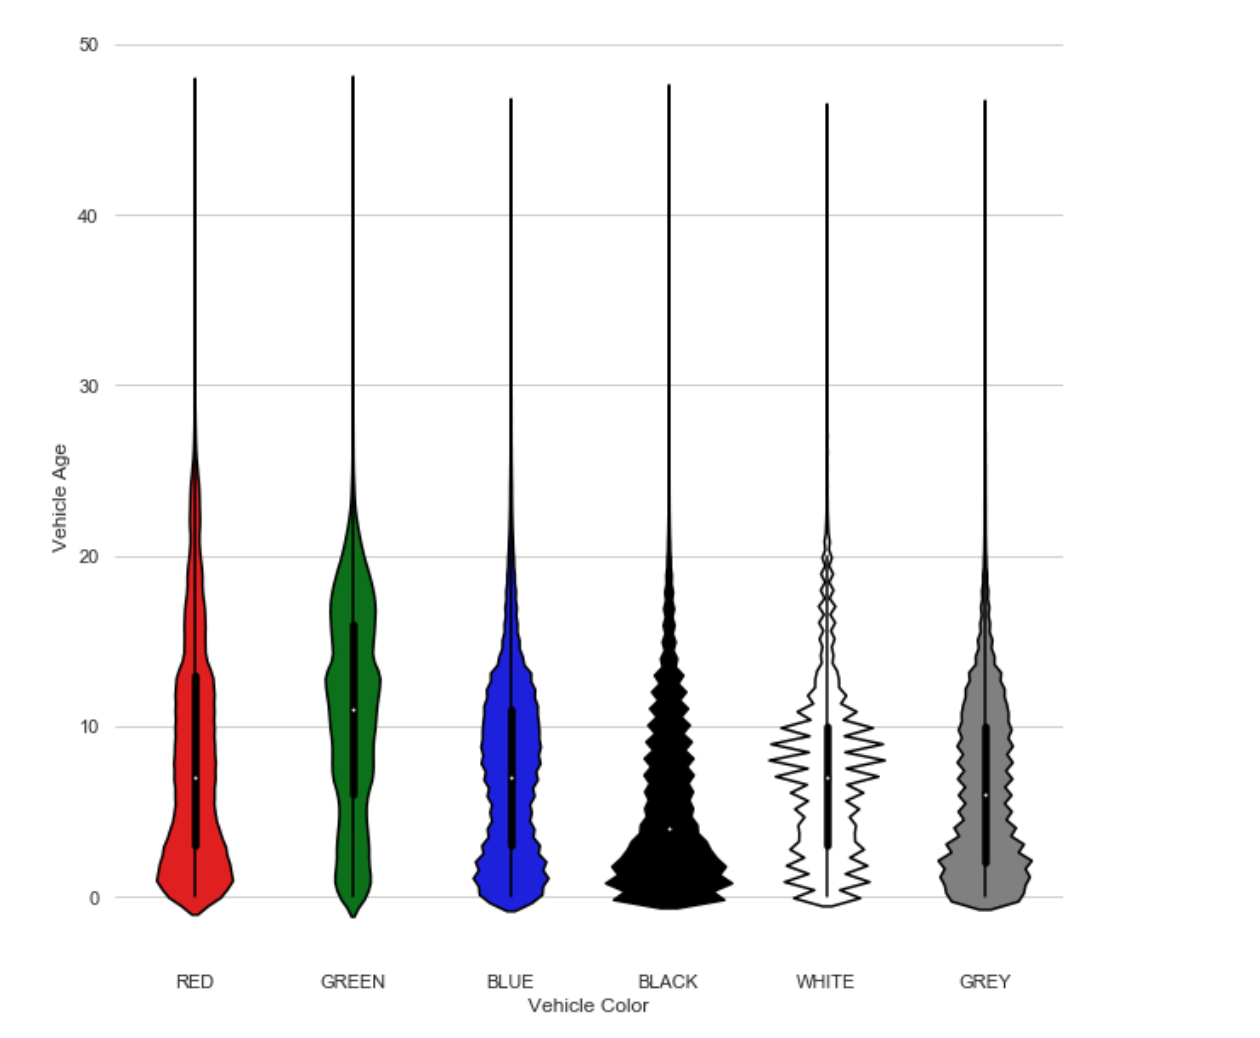


Red, blue, white, and grey vehicles have roughly the same median age (denoted by the white dot), whereas black vehicles tend to be newer and green vehicles tend to be older. All vehicle colors have roughly the same maximum age, but there are more instances of old red and green vehicles than other colors, which is denoted by a thicker line in the upper regions of the red and green plots. Wider areas indicate a higher number of observations, and narrower regions indicate fewer observations.

### Section 7.3.2

In [ ]:
# Listing 7.9
# Plot a violinplot of a random sample
sample = ages_and_colors.sample(frac=0.01)

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

with ProgressBar():
    sns.violinplot(x="Vehicle Color", y="Vehicle Age", data=sample.compute(), order=group_order, palette=group_order, ax=ax)

### Section 7.4

In [ ]:
# Listing 7.10
from datetime import datetime
nyc_data_filtered = nyc_data[nyc_data['Issue Date'] < datetime(2017,1,1)]

day_of_week = nyc_data_filtered['Issue Date'].apply(lambda x: x.strftime("%A"), meta=str)

month_of_year = nyc_data_filtered['Issue Date'].apply(lambda x: x.strftime("%B"), meta=str)

In [ ]:
# Listing 7.11
# Add the columns back to the DataFrame
nyc_data_with_dates_raw = nyc_data_filtered.assign(DayOfWeek = day_of_week).assign(MonthOfYear = month_of_year)
column_map = {'DayOfWeek': 'Day of Week', 'MonthOfYear': 'Month of Year'}
nyc_data_with_dates = nyc_data_with_dates_raw.rename(columns=column_map)

In [ ]:
# Listing 7.12
# Count up the summons by month of year/day of week
with ProgressBar():
    summons_by_mydw = nyc_data_with_dates.groupby(['Day of Week', 'Month of Year'])['Summons Number'].count().compute()

In [ ]:
# Listing 7.13
# Create a pivot table from the result
heatmap_data = summons_by_mydw.reset_index().pivot("Month of Year", "Day of Week", "Summons Number")

In [ ]:
# Listing 7.14
# Create a list of months and weekdays for sorting the data in the heatmap
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Draw a heatmap with Day of Week on the x axis and Month of Year on the Y axis
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap_data.loc[months,weekdays], annot=True, fmt="d", linewidths=1, cmap='Greys', ax=ax)

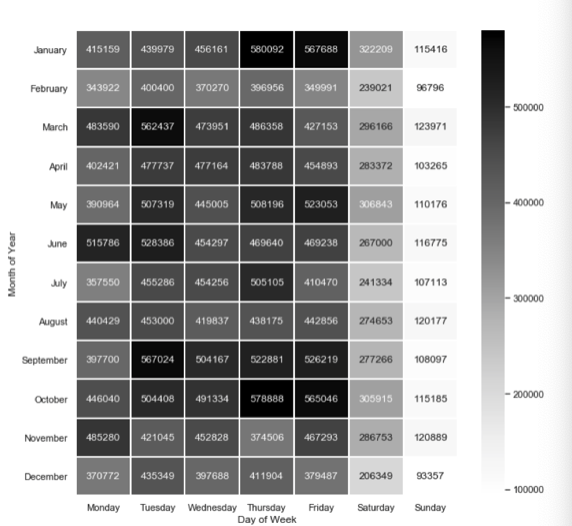